In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, random

from sklearn import model_selection                                  
from sklearn.model_selection import train_test_split      
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler      # Scaling
from sklearn.impute import SimpleImputer

# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn import metrics                                          
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score

from sklearn.linear_model import LogisticRegression     # For logistic Regression
from sklearn.naive_bayes import GaussianNB              # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier      # For K-NN Classifier
from sklearn.svm import SVC                             # For support vector machine based classifier
from sklearn.tree import DecisionTreeClassifier         # For Decision tree

In [2]:
def plot_confusion_matrix(y_test, yhat):
    cm = confusion_matrix(y_test, yhat)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g', cmap=plt.cm.Blues, cbar=False);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix', size=8); 
    ax.xaxis.set_ticklabels(['Nondemented', 'Demented']); ax.yaxis.set_ticklabels(['Nondemented', 'Demented'])


In [3]:

# Logistic Regression
def LoR(X_tr,Y_tr,X_te,Y_te):
  lr = LogisticRegression(random_state=42)
  lr.fit(X_tr,Y_tr)
  lr_y_pred = lr.predict(X_te)

  # Confusion Matrix for the Logistic Regression Model
  plot_confusion_matrix(Y_te,lr_y_pred)

  # Classification Report for the Logistic Regression Model
  print("Classification Report : Logistic Regression")
  classRep = classification_report(Y_te, lr_y_pred, digits=2)
  print(classRep)


In [4]:
# KNN
def KNN(X_train,Y_train,X_test,Y_test):
  # creating odd list of K for KNN
  kvalue = list(range(1,40,2))

  # creating empty list for accuracy odd different value of K
  acc = []

  # perform accuracy metrics for values from different k values
  for k in kvalue:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, Y_train)
      # predict 
      y_pred = knn.predict(X_test)
      # evaluate accuracy
      accuracy = accuracy_score(Y_test, y_pred)
      acc.append(accuracy)

  # determining best k
  bestk = kvalue[acc.index(max(acc))]
  print("The optimal number of neighbors is %d" % bestk)
  plt.plot(kvalue,acc)

  # instantiate learning model (here k = 1)
  knn = KNeighborsClassifier(n_neighbors = bestk, weights = 'uniform', metric='euclidean')

  # fitting the model
  knn.fit(X_train, Y_train)

  # predict the response
  knn_y_pred = knn.predict(X_test)

  # Confusion Matrix for the K-nearest neighbors Model
  plot_confusion_matrix(Y_test,knn_y_pred)

  # Classification Report for the K-nearest neighbors Model
  print("Classification Report : K-nearest neighbors")
  classRep = classification_report(Y_test, knn_y_pred, digits=2)
  print(classRep)


In [5]:
# Naive Bayes
def NB(X_tr,Y_tr,X_te,Y_te):
  # naive bayes
  nb = GaussianNB()
  nb.fit(X_tr , Y_tr)

  # predict the response
  nb_y_pred = nb.predict(X_te)

  # Confusion Matrix for the Naive Bayes
  plot_confusion_matrix(Y_te,nb_y_pred)

  # Classification Report for the Naive Bayes Model
  print("Classification Report : Naive Bayes")
  classRep = classification_report(Y_te, nb_y_pred, digits=2)
  print(classRep)


In [6]:
# Decision Tree
def DT(X_tr,Y_tr,X_te,Y_te):
  # Decison Tree
  dt = DecisionTreeClassifier(random_state=42)
  dt.fit(X_tr , Y_tr)

  # predict the response
  dt_y_pred = dt.predict(X_te)

  # Confusion Matrix for the Decision Tree
  plot_confusion_matrix(Y_te,dt_y_pred)

  # Classification Report for the Decision Tree Model
  print("Classification Report : Decision Tree")
  classRep = classification_report(Y_te, dt_y_pred, digits=2)
  print(classRep)

In [7]:
# SVM
def svm(X_tr,Y_tr,X_te,Y_te):
  # Normally, C = 1 and gamma = 'scale' are default values
  # C controls how wide the margin will be with respect to how many misclassification we are allowing
  # C is increasing --> reduce the size of the margin and fewer misclassification and vice versa
  param_grid = [
      {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
      'gamma': ['scale', 0.5, 0.125, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
      'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
  ]

  optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=5, #  taking 10-fold as in k-fold cross validation
                              scoring='accuracy', 
                              verbose=0,
                              n_jobs=-1)

  optimal_params.fit(X_tr, Y_tr)
  print(optimal_params.best_params_)

  #svm
  C = optimal_params.best_params_['C']
  gamma = optimal_params.best_params_['gamma']
  kernel = optimal_params.best_params_['kernel']

  svm = SVC(C=C, gamma=gamma, kernel=kernel)
  svm.fit(X_tr,Y_tr)

  # predict the response
  svm_y_pred = svm.predict(X_te)

  # Confusion Matrix for the Support Vector Machine Model
  plot_confusion_matrix(Y_te,svm_y_pred)

  # Classification Report for the Support Vector Machine Model
  print("Classification Report : Support Vector Machine")
  classRep = classification_report(Y_te, svm_y_pred, digits=2)
  print(classRep)

### **SPLITTING & TRAINING**

In [25]:
DATA_D = pd.read_csv('/home/senume/Project/MIS/mis-ECG_analysis_DMD/FEATURE_EXTRACTION/Base Paper/BEAT/Features_Beat_Bundle branch block.csv')
DATA_H = pd.read_csv('/home/senume/Project/MIS/mis-ECG_analysis_DMD/FEATURE_EXTRACTION/Base Paper/BEAT/Features_Beat_Health Control.csv')

DATA_D_Label_Shape = DATA_D.shape[0]
DATA_D_Label = np.ones((DATA_D_Label_Shape)).tolist()
DATA_D.insert(len(DATA_D.columns),"Label", DATA_D_Label)

DATA_H_Label_Shape = DATA_H.shape[0]
DATA_H_Label = np.zeros((DATA_H_Label_Shape)).tolist()
DATA_H.insert(len(DATA_H.columns),"Label", DATA_H_Label)

DATASET = pd.concat([DATA_H, DATA_D], ignore_index= True)
X = DATASET.drop(["name", "Label"], axis =1)
Y = DATASET["Label"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y)

Classification Report : Logistic Regression
              precision    recall  f1-score   support

         0.0       0.55      0.78      0.65       456
         1.0       0.52      0.28      0.36       397

    accuracy                           0.55       853
   macro avg       0.54      0.53      0.51       853
weighted avg       0.54      0.55      0.52       853



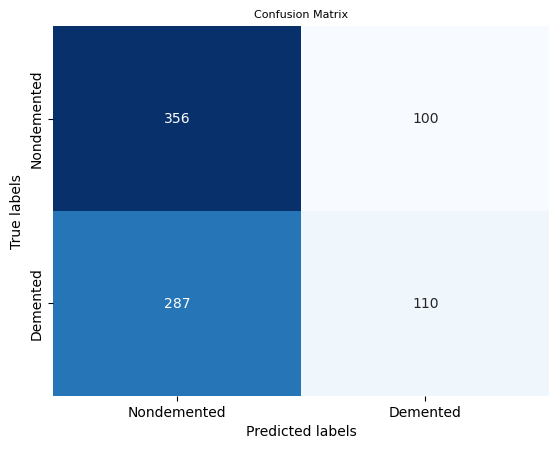

In [27]:
LoR(X_tr=X_train, Y_tr=Y_train, X_te=X_test, Y_te=Y_test)

The optimal number of neighbors is 31
Classification Report : K-nearest neighbors
              precision    recall  f1-score   support

         0.0       0.59      0.64      0.62       456
         1.0       0.55      0.49      0.52       397

    accuracy                           0.57       853
   macro avg       0.57      0.57      0.57       853
weighted avg       0.57      0.57      0.57       853



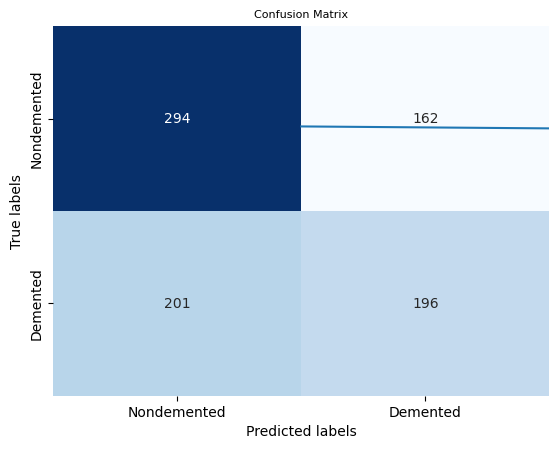

In [29]:
KNN(X_train, Y_train, X_test, Y_test)

Classification Report : Naive Bayes
              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72       456
         1.0       0.67      0.67      0.67       397

    accuracy                           0.70       853
   macro avg       0.69      0.69      0.69       853
weighted avg       0.70      0.70      0.70       853



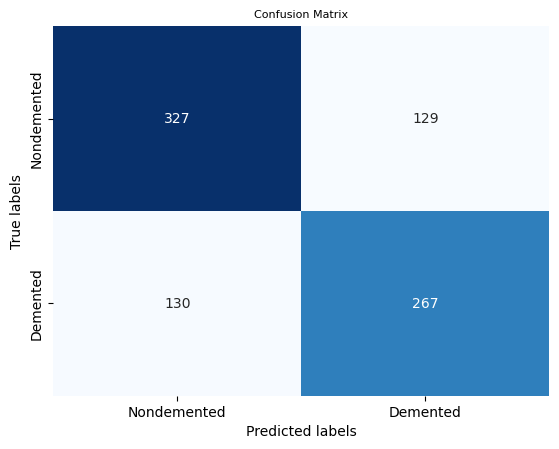

In [30]:
NB(X_tr=X_train, Y_tr=Y_train, X_te=X_test, Y_te=Y_test)

Classification Report : Decision Tree
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       456
         1.0       0.89      0.88      0.89       397

    accuracy                           0.89       853
   macro avg       0.89      0.89      0.89       853
weighted avg       0.89      0.89      0.89       853



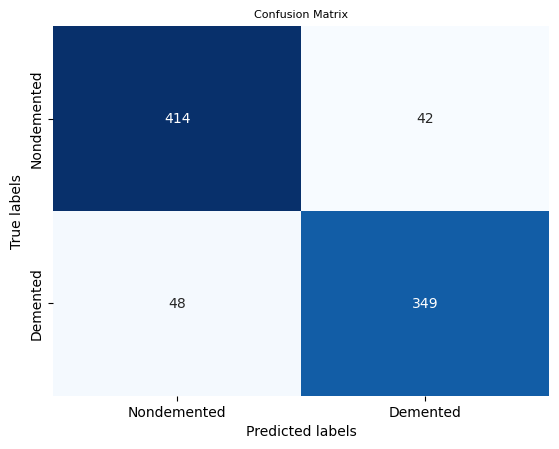

In [31]:
DT(X_tr=X_train, Y_tr=Y_train, X_te=X_test, Y_te=Y_test)

In [32]:
svm(X_tr=X_train, Y_tr=Y_train, X_te=X_test, Y_te=Y_test)
